#### Classification  algorithms

In [2]:
from warnings  import  filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as  np
import  seaborn as  sns
import  matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv(r"C:\Users\admin\Downloads\train_loan.csv")

#### Basic checks

In [5]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [10]:
# drop id
df.drop('id' ,  axis  = 1 , inplace  =  True)

In [11]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

# seperate x and  y

In [12]:
x  =  df.drop('loan_status' , axis = 1)
y  = df['loan_status']

### seperate categorical and numerical  data

In [13]:
cat  =  x.columns[x.dtypes  == 'object']
num  =  x.columns[x.dtypes  != 'object']

In [14]:
df[cat].value_counts()

person_home_ownership  loan_intent      loan_grade  cb_person_default_on_file
RENT                   MEDICAL          B           N                            2577
                       EDUCATION        B           N                            2395
MORTGAGE               EDUCATION        A           N                            2300
                       PERSONAL         A           N                            2169
                       VENTURE          A           N                            1992
                                                                                 ... 
RENT                   HOMEIMPROVEMENT  A           Y                               1
                                        G           Y                               1
                       MEDICAL          B           Y                               1
                       PERSONAL         A           Y                               1
                       VENTURE          A           Y         

### Create  pipeline

In [15]:
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import  OneHotEncoder  ,  StandardScaler
from sklearn.compose  import  ColumnTransformer
from sklearn.impute  import SimpleImputer

In [16]:
cat_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'most_frequent')), 
                                 ('encoder' ,  OneHotEncoder(handle_unknown  =  'ignore'))])
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean')) ,  ('scaler' ,  StandardScaler())])                                  

In [17]:
x.shape

(58645, 11)

In [18]:
pre =  ColumnTransformer([('num' ,  num_pipeline  ,  num) , 
                   ('cat' ,  cat_pipeline ,  cat)])

In [19]:
x_scaled  = pre.fit_transform(x)

In [20]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  0.        ,
         1.        ,  0.        ]], shape=(58645, 26))

In [21]:
len(x_scaled)

58645

In [22]:
len(pre.get_feature_names_out())

26

In [23]:
x_scaled  = pd.DataFrame(x_scaled  , 
columns  =  pre.get_feature_names_out() )

In [24]:
x_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### seperate training and  testing

In [25]:
from sklearn.model_selection  import train_test_split

In [26]:
x_train ,  x_test  ,  y_train  ,  y_test  =  train_test_split(x_scaled  , y , test_size  =  0.25 ,  random_state  =  3)

In [27]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)

(43983, 26) (43983,)
(14662, 26) (14662,)


In [28]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [29]:
y_train.value_counts()

loan_status
0    37688
1     6295
Name: count, dtype: int64

In [30]:
y_test.value_counts()

loan_status
0    12607
1     2055
Name: count, dtype: int64

#### model  fitting

In [31]:
from  sklearn.linear_model import LogisticRegression

In [32]:
LR =  LogisticRegression()

In [33]:
LR.fit(x_train  , y_train  )

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
LR.score(x_train ,  y_train)

0.9114885296591865

In [35]:
LR.score(x_test ,  y_test)

0.9134497340062747

##### model evaluation

In [36]:
from sklearn.metrics  import classification_report, confusion_matrix

In [37]:
train_pred  =  LR.predict(x_train)
print(classification_report(y_train  , train_pred ))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     37688
           1       0.78      0.53      0.63      6295

    accuracy                           0.91     43983
   macro avg       0.85      0.75      0.79     43983
weighted avg       0.90      0.91      0.90     43983



In [38]:
cf  =   confusion_matrix( y_train , train_pred  )

<Axes: >

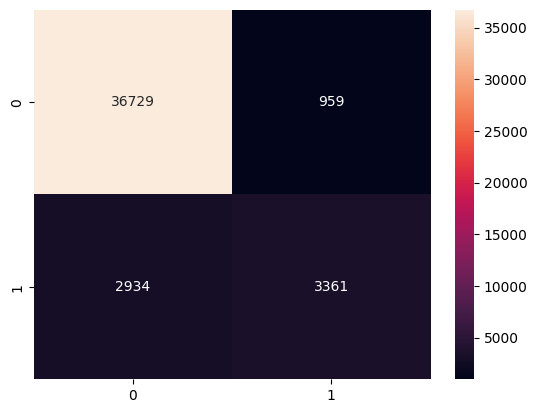

In [39]:
sns.heatmap(cf , annot  =  True  ,  fmt  =  'd')

In [40]:
x_train.shape

(43983, 26)

In [41]:
2934+959

3893

In [42]:
3361+2934

6295

In [43]:
y_train.value_counts()

loan_status
0    37688
1     6295
Name: count, dtype: int64

#### USE OVERSAMPLING

In [44]:
from imblearn.over_sampling  import SMOTE

In [59]:
%pip  install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-l

In [45]:
smote  = SMOTE( random_state = 34)
x_resample  ,  y_resample  =  smote.fit_resample(x_scaled  ,  y)

In [46]:
y_resample.value_counts()

loan_status
0    50295
1    50295
Name: count, dtype: int64

In [47]:
x_train_re  ,  x_test_re  ,  y_train_re ,  y_test_re  =  train_test_split(x_resample ,  y_resample, 
                                                            test_size  =  0.25 ,  random_state  =  3  )

In [48]:
print(x_train_re.shape  ,  y_train_re.shape)
print(x_test_re.shape  ,  y_test_re.shape)

(75442, 26) (75442,)
(25148, 26) (25148,)


In [49]:
LR1  =  LogisticRegression()

In [50]:
LR1.fit( x_train_re  ,  y_train_re  )

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
LR1.score(x_train_re  ,  y_train_re)

0.8386575117308661

In [53]:
LR1.score(x_test_re  ,  y_test_re)

0.8391919834579291

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
LR2 = LogisticRegression()
cv   =  cross_val_score(LR2  ,  x_train_re  ,  y_train_re  ,  n_jobs  =  -1 , cv  =  5 ,  verbose  =  1 ,  scoring  = 'f1_macro' )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s finished


In [58]:
cv.mean()

np.float64(0.8387022422401607)

In [57]:
from sklearn.tree  import DecisionTreeClassifier 
from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm  import SVC

In [63]:
%pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [59]:
from  xgboost  import XGBClassifier

In [60]:
dict1  =  {'LR' :  LogisticRegression(),
        'DT' : DecisionTreeClassifier(max_depth= 5  , min_samples_split= 15 ),
    'RF' : RandomForestClassifier(max_depth= 5  , min_samples_split= 15 ) ,
    'GB' :  GradientBoostingClassifier(),
     'SVC' : SVC(),
      'XGB' :  XGBClassifier(),
      'KNN' :  KNeighborsClassifier()}


### Create  function to evaluate  all models

In [61]:
LR  =  LogisticRegression()
LR.fit(x_train  ,  y_train)
DT  =  DecisionTreeClassifier(max_depth =  7 ,  min_samples_split= 15)
DT.fit(x_train ,  y_train )
RF  = RandomForestClassifier(max_depth  = 7 ,  min_samples_split   = 15 )
RF.fit(x_train ,  y_train)
Gb  =  GradientBoostingClassifier()
Gb.fit(x_train ,  y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [62]:
XGB  = XGBClassifier()
XGB.fit(x_train  ,  y_train)
svm =  SVC()
svm.fit(x_train ,  y_train)
knn =  KNeighborsClassifier( n_neighbors= 5  )
knn.fit(x_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
from sklearn.metrics  import f1_score

In [68]:
def evaluate(model   ,  x , y):
    pred  =  model.predict(x)
    f1 =  f1_score(y ,  pred , average  = 'macro')
    cr  =  classification_report(y  , pred)
    cf  =  confusion_matrix(y ,  pred)
    cv  =  cross_val_score( model  , x ,  y ,  n_jobs= -1 , scoring= 'f1_macro' , cv  =  7 )
    
    print(cv.mean())
    print(f'f1-->{f1}')
    print(f'classification report -->{cr}')
    print(sns.heatmap(cf  ,  annot  = True  , fmt  = 'd'))



##### LOGISTIC REGRESSION EVALUATION

0.79057934001343
f1-->0.7914629042049348
classification report -->              precision    recall  f1-score   support

           0       0.93      0.97      0.95     37688
           1       0.78      0.53      0.63      6295

    accuracy                           0.91     43983
   macro avg       0.85      0.75      0.79     43983
weighted avg       0.90      0.91      0.90     43983

Axes(0.125,0.11;0.62x0.77)


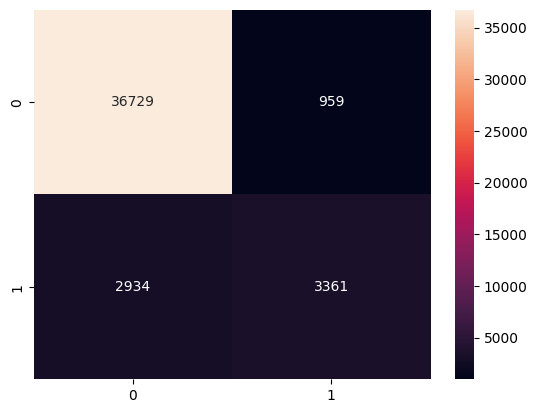

In [69]:
evaluate(LR ,  x_train  , y_train)

0.7885146411068421
f1-->0.7922423465560227
classification report -->              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12607
           1       0.78      0.53      0.63      2055

    accuracy                           0.91     14662
   macro avg       0.85      0.75      0.79     14662
weighted avg       0.91      0.91      0.91     14662

Axes(0.125,0.11;0.62x0.77)


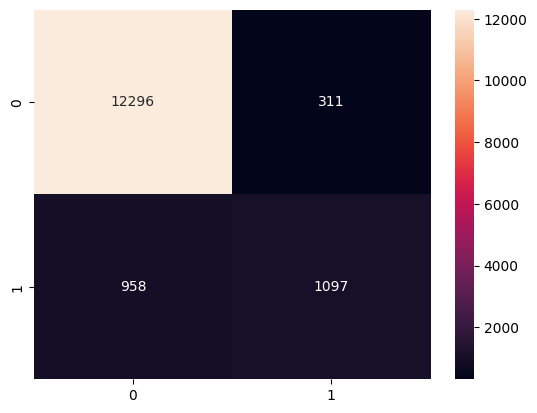

In [70]:
evaluate(LR  , x_test  , y_test)

##### DESICION TREE EVALUATION

0.8834612244388068
f1-->0.888859649122807
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37688
           1       0.94      0.70      0.81      6295

    accuracy                           0.95     43983
   macro avg       0.95      0.85      0.89     43983
weighted avg       0.95      0.95      0.95     43983

Axes(0.125,0.11;0.62x0.77)


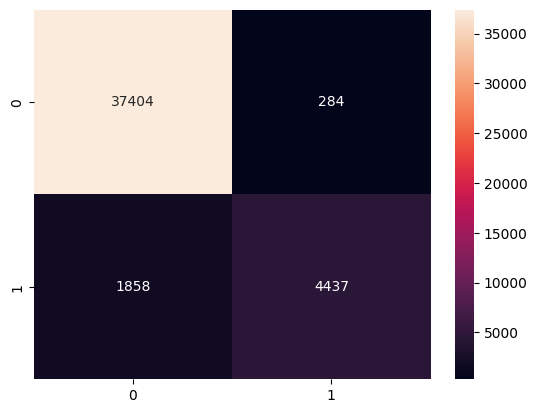

In [71]:
evaluate(DT  ,  x_train  ,  y_train)

0.8739195109398131
f1-->0.8791244910274383
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12607
           1       0.92      0.69      0.79      2055

    accuracy                           0.95     14662
   macro avg       0.94      0.84      0.88     14662
weighted avg       0.95      0.95      0.94     14662

Axes(0.125,0.11;0.62x0.77)


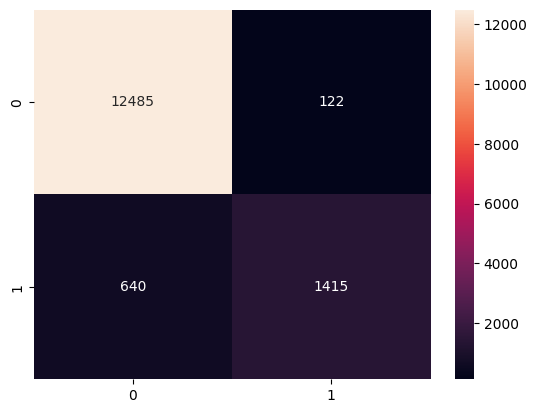

In [72]:
evaluate(DT  ,  x_test  ,  y_test)

#### random Forest  evaluation

0.8784915166672382
f1-->0.8820472982584548
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37688
           1       0.94      0.68      0.79      6295

    accuracy                           0.95     43983
   macro avg       0.95      0.84      0.88     43983
weighted avg       0.95      0.95      0.95     43983

Axes(0.125,0.11;0.62x0.77)


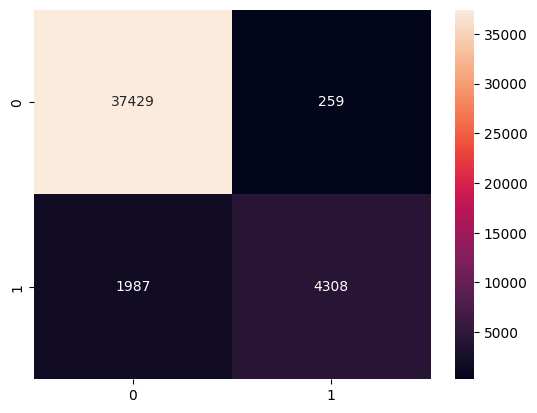

In [73]:
evaluate(RF  , x_train  , y_train)

####  testing evaluation

0.8725759098330624
f1-->0.8748877405529105
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12607
           1       0.93      0.67      0.78      2055

    accuracy                           0.95     14662
   macro avg       0.94      0.83      0.87     14662
weighted avg       0.95      0.95      0.94     14662

Axes(0.125,0.11;0.62x0.77)


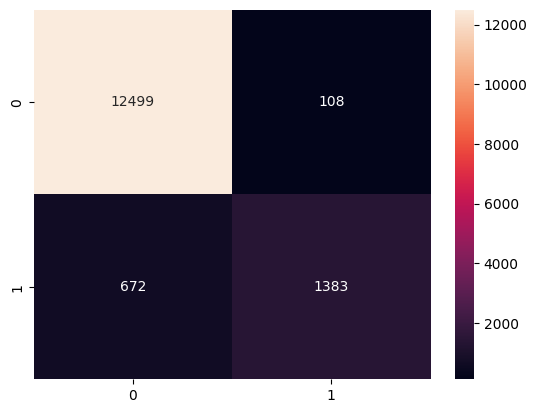

In [74]:
evaluate(RF  ,  x_test  ,  y_test)

#### Gradient  boosting  


0.88747722988919
f1-->0.8906105838519587
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37688
           1       0.93      0.72      0.81      6295

    accuracy                           0.95     43983
   macro avg       0.94      0.85      0.89     43983
weighted avg       0.95      0.95      0.95     43983

Axes(0.125,0.11;0.62x0.77)


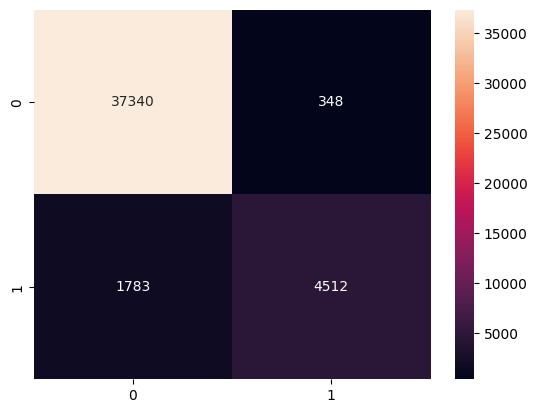

In [75]:
evaluate(Gb ,  x_train , y_train)

0.8789366835558624
f1-->0.8832799025932103
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12607
           1       0.91      0.71      0.80      2055

    accuracy                           0.95     14662
   macro avg       0.93      0.85      0.88     14662
weighted avg       0.95      0.95      0.95     14662

Axes(0.125,0.11;0.62x0.77)


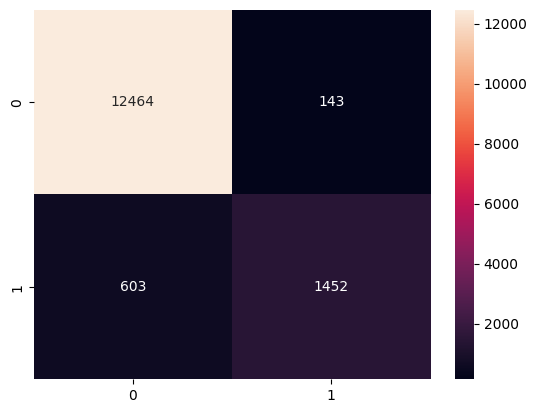

In [76]:
evaluate(Gb  ,  x_test , y_test)

##### XGB 

0.8930249427035607
f1-->0.9279857685487871
classification report -->              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37688
           1       0.96      0.80      0.87      6295

    accuracy                           0.97     43983
   macro avg       0.96      0.90      0.93     43983
weighted avg       0.97      0.97      0.97     43983

Axes(0.125,0.11;0.62x0.77)


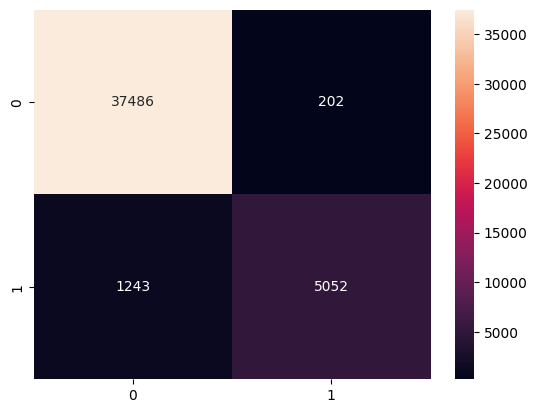

In [78]:
evaluate(XGB , x_train ,  y_train)

0.878536237153512
f1-->0.8892912278355898
classification report -->              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12607
           1       0.90      0.73      0.81      2055

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662

Axes(0.125,0.11;0.62x0.77)


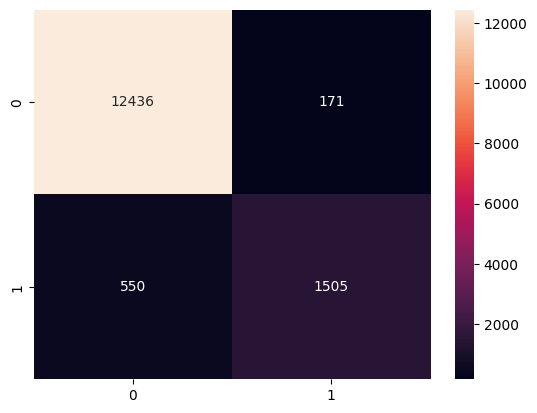

In [79]:
evaluate(XGB  ,  x_test ,  y_test)

#### SVM 

0.8695186426027902
f1-->0.8773110440499469
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37688
           1       0.93      0.68      0.79      6295

    accuracy                           0.95     43983
   macro avg       0.94      0.84      0.88     43983
weighted avg       0.95      0.95      0.94     43983

Axes(0.125,0.11;0.62x0.77)


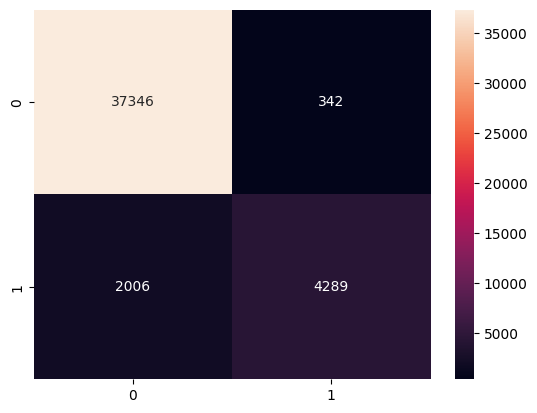

In [81]:
evaluate(svm  ,  x_train  ,  y_train)

0.8577274401260766
f1-->0.8667428582077407
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12607
           1       0.91      0.66      0.77      2055

    accuracy                           0.94     14662
   macro avg       0.93      0.83      0.87     14662
weighted avg       0.94      0.94      0.94     14662

Axes(0.125,0.11;0.62x0.77)


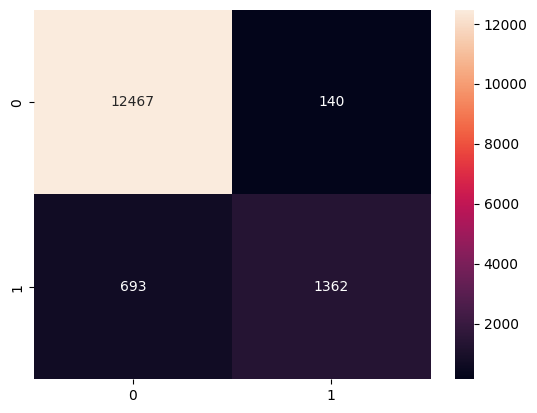

In [82]:
evaluate(svm , x_test , y_test)

#### KNN

0.8465795588817516
f1-->0.8795671127373907
classification report -->              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37688
           1       0.91      0.70      0.79      6295

    accuracy                           0.95     43983
   macro avg       0.93      0.84      0.88     43983
weighted avg       0.95      0.95      0.94     43983

Axes(0.125,0.11;0.62x0.77)


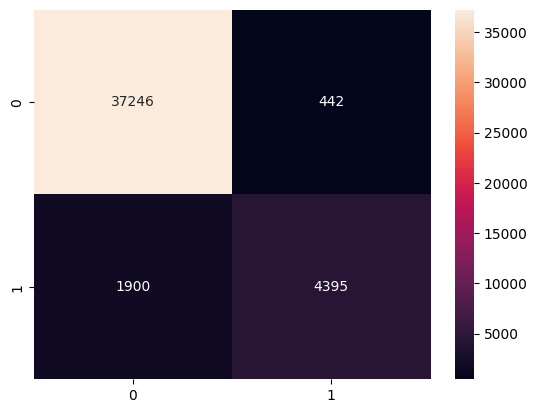

In [83]:
evaluate(knn  , x_train  , y_train )

0.8204470144444199
f1-->0.8445853294328116
classification report -->              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12607
           1       0.84      0.64      0.73      2055

    accuracy                           0.93     14662
   macro avg       0.89      0.81      0.84     14662
weighted avg       0.93      0.93      0.93     14662

Axes(0.125,0.11;0.62x0.77)


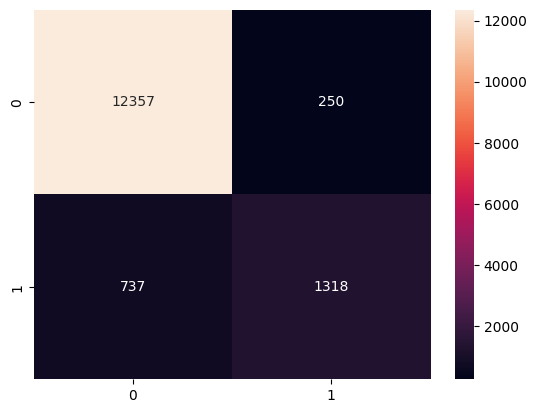

In [84]:
evaluate(knn  , x_test  , y_test)

#### best  model 

In [85]:
XGB

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### sample  data / prediction  on unseen data


In [86]:
sample  =  pd.read_csv(r"C:\Users\admin\Downloads\test_loan.csv")

#### basic checks

In [87]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [88]:
sample.shape

(39098, 12)

In [89]:
sample.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [90]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [93]:
x.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [94]:
x.shape

(58645, 11)

In [96]:
sample_scaled =  pre.transform(sample)

In [97]:
sample_scaled

array([[-0.75700653,  0.13014081, -0.43612143, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25971541,  0.8415031 ,  0.33940391, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25971541, -0.8973825 ,  0.08089546, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92277024, -0.73930199, -0.17761298, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56910312, -0.50218123,  0.33940391, ...,  0.        ,
         1.        ,  0.        ]], shape=(39098, 26))

In [98]:
sample_scaled =  pd.DataFrame(sample_scaled  ,  columns =  pre.get_feature_names_out())

In [99]:
sample_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.757007,0.130141,-0.436121,2.824250,1.688238,2.187295,-0.940719,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.259715,0.841503,0.339404,0.134238,0.668431,-0.650135,-0.449573,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.259715,-0.897382,0.080895,-0.941767,2.161719,-0.322739,-0.940719,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.900631,-0.370447,-0.177613,-0.403765,-0.583149,-0.213607,0.287147,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.259715,0.999584,0.856421,1.030908,1.873657,-0.104475,-0.449573,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [100]:
pred  =  XGB.predict(sample_scaled)

In [101]:
pred

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))